📊 Spearman correlation results:

Escherichia: r = 0.01, p = 0.5272
Klebsiella: r = 0.07, p = 0.002169
Salmonella: r = 0.04, p = 0.2837
Enterococcus: r = -0.09, p = 0.03855

Top 4 combined: r = 0.12, p = 1.969e-19
Other: r = 0.38, p = 4.849e-192



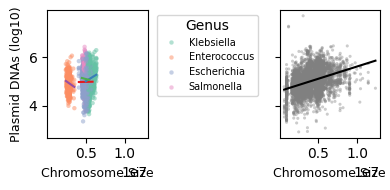

✅ Two-panel plot saved to: /mnt/e/Figure_files/Fig_2/Fig_2/Supplementary_figure_2b_two_panels2.pdf


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

# Load the merged DataFrame
merged_path = 'S1_A.xlsx'
df = pd.read_excel(merged_path)

# Identify top 4 genera
top_4_genus = df['Genus'].value_counts().nlargest(4).index

# Create "Genus_group" column: keep top 4, others become "Other"
df['Genus_group'] = df['Genus'].where(df['Genus'].isin(top_4_genus), 'Other')

# Log10 transform Plasmid_DNA
df['Log10_Plasmid_DNA'] = np.log10(df.iloc[:, 5])  # assuming col 6 is Plasmid_DNA
chromosome_size_col = df.columns[3]  # assuming col 4 is Chromosome_size

# Split data
df_top4 = df[df['Genus_group'] != 'Other']
df_other = df[df['Genus_group'] == 'Other']

# ---------------- Spearman correlations ----------------
print("📊 Spearman correlation results:\n")

# Top 4 genera individually
for genus in top_4_genus:
    sub_data = df_top4[df_top4['Genus_group'] == genus]
    rho, p = spearmanr(sub_data[chromosome_size_col], sub_data['Log10_Plasmid_DNA'])
    print(f"{genus}: r = {rho:.2f}, p = {p:.4g}")

# All top 4 combined
rho_top4, p_top4 = spearmanr(df_top4[chromosome_size_col], df_top4['Log10_Plasmid_DNA'])
print(f"\nTop 4 combined: r = {rho_top4:.2f}, p = {p_top4:.4g}")

# Other
rho_other, p_other = spearmanr(df_other[chromosome_size_col], df_other['Log10_Plasmid_DNA'])
print(f"Other: r = {rho_other:.2f}, p = {p_other:.4g}\n")

# ---------------- Plot ----------------
fig, axes = plt.subplots(1, 2, figsize=(4, 2), sharex=True, sharey=True)

# Panel 1: Top 4 genera
sns.scatterplot(
    data=df_top4,
    x=chromosome_size_col,
    y='Log10_Plasmid_DNA',
    hue='Genus_group',
    palette='Set2',
    alpha=0.5,
    edgecolor='none',
    s=10,
    ax=axes[0]
)

for genus in top_4_genus:
    sub_data = df_top4[df_top4['Genus_group'] == genus]
    sns.regplot(
        data=sub_data,
        x=chromosome_size_col,
        y='Log10_Plasmid_DNA',
        scatter=False,
        ci=None,
        line_kws={'linewidth': 1.5},
        color=sns.color_palette('Set1')[list(top_4_genus).index(genus)],
        ax=axes[0]
    )

axes[0].set_xlabel('Chromosome Size', fontsize=9)
axes[0].set_ylabel('Plasmid DNAs (log10)', fontsize=9)
axes[0].legend(title='Genus', fontsize=7, loc='upper left', bbox_to_anchor=(1.05, 1))

# Panel 2: Other
sns.scatterplot(
    data=df_other,
    x=chromosome_size_col,
    y='Log10_Plasmid_DNA',
    color='gray',
    alpha=0.4,
    edgecolor='none',
    s=5,
    ax=axes[1]
)

sns.regplot(
    data=df_other,
    x=chromosome_size_col,
    y='Log10_Plasmid_DNA',
    scatter=False,
    ci=None,
    line_kws={'linewidth': 1.5, 'color': 'black'},
    ax=axes[1]
)

axes[1].set_xlabel('Chromosome Size', fontsize=9)
axes[1].set_ylabel('')

plt.tight_layout()

# Save
output_path = 'S2_A.pdf'
plt.savefig(output_path, format='pdf', dpi=1200, bbox_inches='tight')
plt.show()

print(f"✅ Two-panel plot saved to: {output_path}")
